In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

%matplotlib inline

In [5]:
import os
os.getcwd()

'D:\\Study\\Python'

In [21]:
# Инфраструктура
news_df = pd.read_csv('data\\MVD_News\\news_with_location.csv')
objects_df = pd.read_csv('data/OpenData/Nedvizhimoe_imusheshestvo_zemelnye_uchastki.csv')
houses_df = pd.read_csv('data/OpenData/Tehniko_econ_pasporta_zhilyh_domov.csv')
amenities_df = pd.read_csv('data/OpenStreetMap/amenities.csv')
shops_df = pd.read_csv('data/OpenStreetMap/shops.csv')

# Общественный траспорт
agency_df = pd.read_csv('data/Transport/gtfs_feed/agency.txt')
stops_df = pd.read_csv('data/Transport/gtfs_feed/stops.txt')
routes_df = pd.read_csv('data/Transport/gtfs_feed/routes.txt')
trips_df = pd.read_csv('data/Transport/gtfs_feed/trips.txt')
stop_times_df = pd.read_csv('data/Transport/gtfs_feed/stop_times.txt')
calendar_df = pd.read_csv('data/Transport/gtfs_feed/calendar.txt')
calendar_exceptions_df = pd.read_csv('data/Transport/gtfs_feed/calendar_dates.txt')
fare_attributes_df = pd.read_csv('data/Transport/gtfs_feed/fare_attributes.txt')
fare_rules_df = pd.read_csv('data/Transport/gtfs_feed/fare_rules.txt')
shapes_df = pd.read_csv('data/Transport/gtfs_feed/shapes.txt')
frequencies_df = pd.read_csv('data/Transport/gtfs_feed/frequencies.txt')
points_df = pd.read_csv('data/Transport/gtfs_feed/points.csv')

# проблемы города
problems_df = pd.read_csv('data/GorodGovSpb/GorodGovSpb.csv')
# треки людей
tracks_df = pd.read_csv('data/OpenGPS/tracks.csv')
track_points_df = pd.read_csv('data/OpenGPS/points.csv')

# Общая информация о данных

В этом разделе собраны базовые статистики и первый взгляд на данные, с которыми вам предстоит работать.
Дополнительную информацию можно найти в файле с описанием.

## Новости МВД

In [5]:
display(news_df.info())
display(news_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 6 columns):
id            6140 non-null int64
title         6140 non-null object
time          6140 non-null object
lat           6140 non-null float64
lng           6140 non-null float64
decreepart    6140 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 287.9+ KB


None

,id,title,time,lat,lng,decreepart
0,11624017,В Красносельском районе гражданин привлечен к ...,2017-11-20 13:07:00,59.836513,30.133829,ст.20.8 (Нарушение Правил Хранения Оружия и Па...
1,11620224,"Полиция разыскивает злоумышленника, ограбившег...",2017-11-20 08:35:00,59.998492,29.759626,ч.2 ст.161 (Грабеж); Уголовный Кодекс; Россия
2,11617626,В Ленобласти задержан подозреваемый в хищении ...,2017-11-19 10:48:00,60.076238,30.121383,ч.2 ст.158 (Кража); Уголовный Кодекс; Россия
3,11617623,В Петербурге задержан автоугонщик,2017-11-19 10:45:00,59.861774,30.174635,ч.1 ст.166 (Неправомерное Завладение Автомобил...
4,11606722,В Санкт-Петербурге задержаны подозреваемые в х...,2017-11-17 11:23:00,59.972558,30.304503,"ч.2 ст.164 (Хищение Предметов, Имеющих Особую ..."


In [39]:
news_df.decreepart.value_counts()

ч.2 ст.158 (Кража); Уголовный Кодекс; Россия                                                                                                                                 604
ч.2 ст.162 (Разбой); Уголовный Кодекс; Россия                                                                                                                                438
ч.2 ст.161 (Грабеж); Уголовный Кодекс; Россия                                                                                                                                374
ч.3 ст.30; Уголовный Кодекс; Россия                                                                                                                                          242
ч.2 ст.158; Уголовный Кодекс; Россия                                                                                                                                         215
ч.2 ст.228; Уголовный Кодекс; Россия                                                                               

## Нежилые объекты и земельные участки

In [6]:
display(objects_df.info())
display(objects_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41337 entries, 0 to 41336
Data columns (total 9 columns):
﻿Адрес                  41337 non-null object
Район                   41337 non-null object
Тип объекта             41337 non-null object
Правовой режим          41335 non-null object
Площадь                 41234 non-null float64
Использование           41312 non-null object
Остаточная стоимость    34278 non-null float64
lng                     41337 non-null float64
lat                     41337 non-null float64
dtypes: float64(4), object(5)
memory usage: 2.8+ MB


None

,﻿Адрес,Район,Тип объекта,Правовой режим,Площадь,Использование,Остаточная стоимость,lng,lat
0,"199151, г.Санкт-Петербург, Гаванская улица, д....",Василеостровский,Здание,Оперативное управление,1363.4,учебное,1394988.89,30.235110,59.939379
1,"Санкт-Петербург, город Петергоф, Петергофская ...",Петродворцовый,Здание,Имущество казны,39.4,нежилое,261897.46,29.859797,59.874738
2,"198259, г.Санкт-Петербург, проспект Ветеранов,...",Красносельский,Здание,Имущество казны,23.2,нежилое,27615.04,30.157387,59.835351
3,"195160, г.Санкт-Петербург, шоссе Революции, д....",Красногвардейский,Здание,Имущество казны,594.7,нежилое,NaN,30.474124,59.964901
4,"Санкт-Петербург, город Кронштадт, Цитадельское...",Кронштадтский,Здание,Имущество казны,63.3,нежилое,NaN,29.717741,60.007210


In [35]:
objects_df['Использование'].value_counts()

нежилое             18269
жилое               12565
другое               3239
учебное              2607
производственное     2280
дача                 1402
лечебное              660
административное      290
Name: Использование, dtype: int64

## Жилые многоквартирные дома

In [53]:
display(houses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22254 entries, 0 to 22253
Data columns (total 11 columns):
Улица                     22254 non-null object
Дом                       22254 non-null object
Район                     22254 non-null object
Количество проживающих    17641 non-null float64
Год постройки             22254 non-null object
Серия, тип проекта        17941 non-null object
Общая площадь здания      22253 non-null float64
Число этажей              22248 non-null float64
Число лестниц             22133 non-null float64
lng                       22254 non-null float64
lat                       22254 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.9+ MB


None

In [43]:
houses_df.head()

,Улица,Дом,Район,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112


In [75]:
houses_df = pd.read_csv('data/OpenData/Tehniko_econ_pasporta_zhilyh_domov.csv')

In [85]:
houses_df = houses_df[(houses_df.lng < 31.1) & (houses_df.lng > 29.6)]
houses_df = houses_df[(houses_df.lat < 60.12) & (houses_df.lat > 59.7)]
houses_df = houses_df.dropna()
houses_df

,Улица,Дом,Район,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112
5,Флотская ул.,5,Кронштадский,121.0,1973,Индивидуальный,3885.600098,5.0,3.0,30.473965,60.059112
6,Лени Голикова ул.,49,Кировский,194.0,1967,Г-3,3701.899902,5.0,7.0,30.234920,59.840552
7,Димитрова ул.,31,Фрунзенский,1321.0,1981,137,40146.800781,12.0,9.0,30.409150,59.851188
8,Шателена ул.,2,Выборгский,103.0,1961,1-528-КП-99,2783.000000,5.0,3.0,30.364329,60.001551
9,Шателена ул.,16,Выборгский,113.0,1960,Индивидуальный,2731.000000,5.0,3.0,30.360563,60.004269


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E2013D76D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002E2015342B0>]], dtype=object)

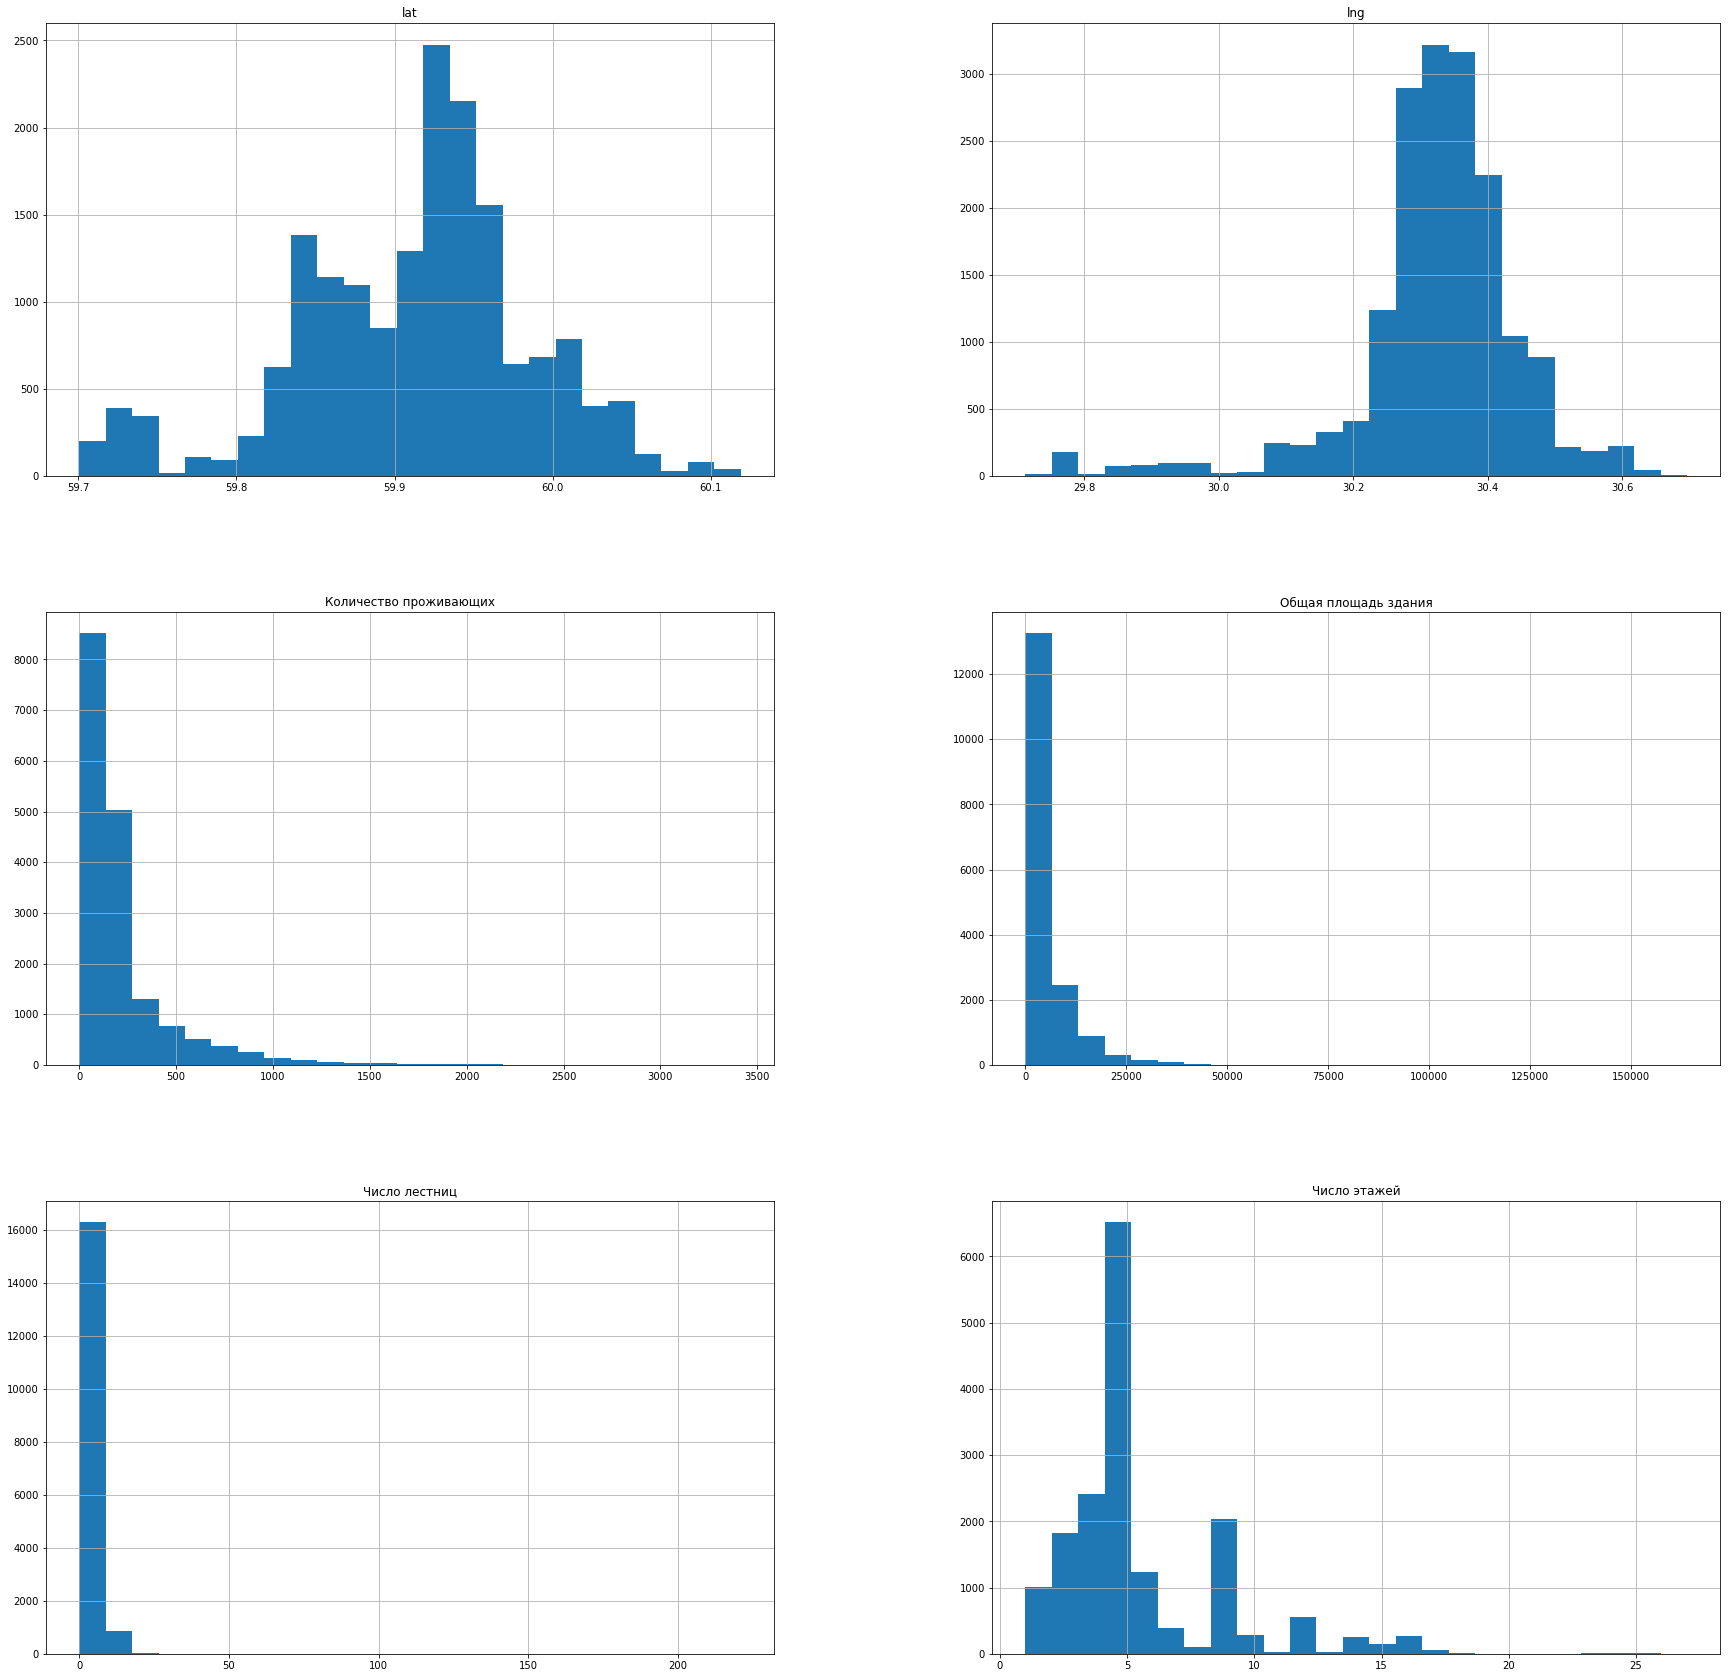

In [82]:
houses_df.hist(figsize=(30,30), bins=25)

### BUS STOPS NY

In [95]:
bus_stops_ny = pd.read_csv('Bus_Stop_Shelter.csv', sep=',')

In [96]:
bus_stops_ny.head()

,LOCATION,SHELTER_ID,the_geom,AT_BETWEEN,LONGITUDE,LATITUDE
0,MONTROSE AV,BR0003,POINT (-73.947831 40.706812),LORIMER ST,-73.947831,40.706812
1,GRAHAM AV,BR0014,POINT (-73.945162 40.719097),HERBERT ST,-73.945162,40.719097
2,BROADWAY,BR0026,POINT (-73.945783 40.702976),LEONARD ST,-73.945783,40.702976
3,KINGSLAND AV,BR0028,POINT (-73.940836 40.720195),HERBERT ST,-73.940836,40.720195
4,VANDERBILT AV,BR0040,POINT (-73.969795 40.69344),MYRTLE AV,-73.969795,40.693440


In [104]:
bus_stops_ny.sample(250)[['LONGITUDE', 'LATITUDE']].to_csv('coord_bus_ny_sample.csv', sep=';')

In [101]:
bus_stops_ny[['LATITUDE', 'LONGITUDE']].to_csv('coord_bus_ny.csv', sep=';')

In [93]:
houses_df.to_csv('spb_houses.csv', sep=';')

In [71]:
houses_df_2.head()

,Улица,Дом,Район,Количество проживающих,Год постройки,"Серия, тип проекта",Общая площадь здания,Число этажей,Число лестниц,lng,lat
0,Лени Голикова ул.,23,Кировский,213.0,1967,Г-3И,3601.449951,5.0,7.0,30.229946,59.844715
1,Среднегаванский пр.,14,Василеостровский,69.0,1901,Индивидуальный,1581.380005,6.0,2.0,30.243179,59.930236
2,Рашетова ул.,9,Выборгский,82.0,1965,Индивидуальный,2334.000000,9.0,1.0,30.324209,60.020927
3,Сердобольская ул.,37,Приморский,60.0,1916,Индивидуальный,1978.150024,5.0,1.0,30.316559,59.989446
4,Флотская ул.,2,Кронштадский,344.0,1900,Индивидуальный,8968.500000,3.0,4.0,30.473965,60.059112


In [73]:
houses_df_2[['lng', 'lat']] 

,lng,lat
0,30.229946,59.844715
1,30.243179,59.930236
2,30.324209,60.020927
3,30.316559,59.989446
4,30.473965,60.059112
5,30.473965,60.059112
6,30.234920,59.840552
7,30.409150,59.851188
8,30.364329,60.001551
9,30.360563,60.004269


In [74]:
len(houses_df_2)

17197

In [58]:
len(houses_df)

21653

##  Общественные заведения

In [8]:
display(amenities_df.info())
display(amenities_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30284 entries, 0 to 30283
Data columns (total 4 columns):
﻿amenity    30284 non-null object
name        10863 non-null object
lat         30284 non-null float64
lon         30284 non-null float64
dtypes: float64(2), object(2)
memory usage: 946.4+ KB


None

,﻿amenity,name,lat,lon
0,fuel,Киришиавтосервис,60.026545,30.431610
1,fuel,Линос,60.031897,30.431773
2,restaurant,Калипсо,60.123112,29.941688
3,post_office,Санкт-Петербург 195276,60.046443,30.387773
4,bank,Сбербанк,60.012234,30.411885


In [42]:
amenities_df.amenity.value_counts()

bench                     5717
waste_basket              3656
waste_disposal            3183
cafe                      2238
atm                       1541
pharmacy                  1279
restaurant                1168
fast_food                 1147
bank                      1022
post_box                   848
parking                    537
bar                        529
bicycle_parking            489
dentist                    481
toilets                    461
drinking_water             449
doctors                    376
car_wash                   373
recycling                  333
telephone                  266
pub                        258
kindergarten               240
police                     222
clinic                     218
parking_entrance           215
vending_machine            209
library                    178
post_office                174
payment_terminal           174
fountain                   164
                          ... 
motorcycle_parking           1
preschoo

## Магазины

In [9]:
display(shops_df.info())
display(shops_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 4 columns):
﻿shop    18110 non-null object
name     14494 non-null object
lat      18110 non-null float64
lon      18110 non-null float64
dtypes: float64(2), object(2)
memory usage: 566.0+ KB


None

,﻿shop,name,lat,lon
0,computer,Кей,60.048933,30.379963
1,photo,Яркий мир,60.043032,30.385281
2,supermarket,Магнит,60.046957,30.387773
3,supermarket,Магнит,60.043218,30.384391
4,supermarket,Народная 7Я семьЯ,60.012534,30.411242


In [32]:
shops_df.shop.value_counts()

convenience                                2927
supermarket                                1909
clothes                                    1190
hairdresser                                 819
florist                                     760
beauty                                      732
car_repair                                  632
mobile_phone                                473
alcohol                                     461
shoes                                       403
bakery                                      371
jewelry                                     313
hardware                                    297
pet                                         291
doityourself                                283
furniture                                   283
butcher                                     275
car_parts                                   266
optician                                    227
electronics                                 219
greengrocer                             

## Общественный транспорт
### Конкретные поездки по соответствующим маршрутам

In [10]:
trips_agg_routes = pd.merge(routes_df, trips_df, on='route_id', how='left')
display(trips_agg_routes.info())
display(trips_agg_routes.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331116 entries, 0 to 331115
Data columns (total 13 columns):
route_id            331116 non-null int64
agency_id           331116 non-null object
route_short_name    331116 non-null object
route_long_name     331116 non-null object
route_type          331116 non-null int64
transport_type      331116 non-null object
circular            331116 non-null int64
urban               331116 non-null int64
night               331116 non-null int64
service_id          330773 non-null float64
trip_id             330773 non-null float64
direction_id        330773 non-null float64
shape_id            322591 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 35.4+ MB


None

,route_id,agency_id,route_short_name,route_long_name,route_type,transport_type,circular,urban,night,service_id,trip_id,direction_id,shape_id
0,3812,orgp,193,"АС ""УЛ. ЖЕНИ ЕГОРОВОЙ"" - ПР. КОРОЛЁВА",3,bus,0,1,0,NaN,NaN,NaN,NaN
1,3830,orgp,191/,"Р.Оккервиль - СТ.Метро""ПЕТРОГРАДСКАЯ""",3,bus,0,1,0,NaN,NaN,NaN,NaN
2,3850,orgp,7/,МОСКОВСКИЙ ВОКЗАЛ - Исаакиевская пл.,3,bus,0,1,0,NaN,NaN,NaN,NaN
3,3851,orgp,10/,"А.С.""КРЕСТОВСКИЙ ОСТРОВ"" - БАЛТИЙСКИЙ ВОКЗАЛ",3,bus,0,1,0,NaN,NaN,NaN,NaN
4,3857,orgp,С-1,"СТ.М.""ДЕВЯТКИНО""-СТ.М.""ПР.ВЕТЕРАНОВ""",3,bus,0,1,0,NaN,NaN,NaN,NaN


### Остановки во время поездок

In [11]:
stops_times = pd.merge(stops_df, stop_times_df, how='left', on='stop_id')
stops_during_trips = pd.merge(trips_df, stops_times, on='trip_id', how='left')

In [12]:
display(stops_during_trips.info())
display(stops_during_trips.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4403351 entries, 0 to 4403350
Data columns (total 18 columns):
route_id               int64
service_id             int64
trip_id                int64
direction_id           int64
shape_id_x             object
stop_id                float64
stop_code              float64
stop_name              object
stop_lat               float64
stop_lon               float64
location_type          float64
wheelchair_boarding    float64
transport_type         object
arrival_time           object
departure_time         object
stop_sequence          float64
shape_id_y             object
shape_dist_traveled    float64
dtypes: float64(8), int64(4), object(6)
memory usage: 638.3+ MB


None

,route_id,service_id,trip_id,direction_id,shape_id_x,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,wheelchair_boarding,transport_type,arrival_time,departure_time,stop_sequence,shape_id_y,shape_dist_traveled
0,3918,41035,13911366,1,track-46869,1378.0,1378.0,БОБЫЛЬСКАЯ ДОРОГА,59.882800,29.854540,0.0,2.0,bus,05:57:00,05:57:00,1.0,stage-1179918,0.63
1,3918,41035,13911366,1,track-46869,1785.0,1785.0,ПЛОЩАДЬ АВРОВА,59.874472,29.921196,0.0,2.0,bus,06:16:00,06:16:00,13.0,stage-1179930,6.94
2,3918,41035,13911366,1,track-46869,2588.0,2588.0,"КОНСТАНТИНОВСКАЯ УЛ., НИКОЛАЕВСКАЯ БОЛЬНИЦА",59.878712,29.917416,0.0,2.0,bus,06:14:00,06:14:00,11.0,stage-1179928,6.16
3,3918,41035,13911366,1,track-46869,2880.0,2880.0,МАСТЕРОВОЙ ПЕР.,59.881852,29.895791,0.0,2.0,bus,06:10:00,06:10:00,8.0,stage-1179925,4.81
4,3918,41035,13911366,1,track-46869,3156.0,3156.0,РАЗВОДНАЯ УЛ.,59.880639,29.904138,0.0,2.0,bus,06:12:00,06:12:00,9.0,stage-1179926,5.32


### Даты, по которым маршрут активен, с исключениями (праздники, замены и т.п.)

In [13]:
calendar = pd.merge(calendar_df, calendar_exceptions_df, how='left', on='service_id')
display(calendar.info())
display(calendar.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74943 entries, 0 to 74942
Data columns (total 13 columns):
service_id        74943 non-null int64
monday            74943 non-null int64
tuesday           74943 non-null int64
wednesday         74943 non-null int64
thursday          74943 non-null int64
friday            74943 non-null int64
saturday          74943 non-null int64
sunday            74943 non-null int64
start_date        74943 non-null int64
end_date          74943 non-null int64
service_name      74943 non-null object
date              74535 non-null float64
exception_type    74535 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 8.0+ MB


None

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,service_name,date,exception_type
0,41035,1,1,1,1,1,1,1,20170708,20191230,Ежедневно,NaN,NaN
1,43283,1,1,1,1,1,0,0,20170828,20191230,Будние дни,20100227.0,1.0
2,43283,1,1,1,1,1,0,0,20170828,20191230,Будние дни,20100308.0,2.0
3,43283,1,1,1,1,1,0,0,20170828,20191230,Будние дни,20100510.0,2.0
4,43283,1,1,1,1,1,0,0,20170828,20191230,Будние дни,20100503.0,2.0


### Информация об оплате проезда

In [14]:
# Стоимость также зависит от поездки (route)
fare_info = pd.merge(fare_rules_df, fare_attributes_df, on='fare_id', how='left')
display(fare_info.info())
display(fare_info.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 465
Data columns (total 6 columns):
fare_id           466 non-null int64
route_id          466 non-null int64
price             466 non-null int64
currency_type     466 non-null object
payment_method    466 non-null int64
transfers         466 non-null int64
dtypes: int64(5), object(1)
memory usage: 25.5+ KB


None

,fare_id,route_id,price,currency_type,payment_method,transfers
0,1,338,40,RUB,0,0
1,1,1318,40,RUB,0,0
2,1,332,40,RUB,0,0
3,1,1316,40,RUB,0,0
4,1,1314,40,RUB,0,0


### Координаты транспорта
Оставшиеся данные представляют собой различные признаки маршрутов и машин: сегменты конкретной поездки (shapes), частоту для маршрутов без расписания (frequencies) и т.д.    

In [15]:
display(points_df.info())
display(points_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168890 entries, 0 to 168889
Data columns (total 2 columns):
lat    168890 non-null float64
lon    168890 non-null float64
dtypes: float64(2)
memory usage: 2.6 MB


None

,lat,lon
0,59.985067,30.230708
1,59.985065,30.230707
2,59.985064,30.230715
3,59.985285,30.230792
4,59.985405,30.229878


## "Проблемы" города, о которых сообщили жители

In [16]:
display(problems_df.info())
display(problems_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527664 entries, 0 to 527663
Data columns (total 10 columns):
building       355864 non-null float64
category       527664 non-null object
city_object    527664 non-null object
district       527664 non-null object
is_public      527664 non-null bool
lat            527664 non-null float64
lng            527664 non-null float64
problem_id     527664 non-null int64
reason         527664 non-null object
status         527664 non-null object
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 36.7+ MB


None

,building,category,city_object,district,is_public,lat,lng,problem_id,reason,status
0,37247.0,Благоустройство,Двор,Петродворцовый,True,59.885960,29.859898,558675,Мусор на газонах,Получен ответ
1,25587.0,Благоустройство,Двор,Петродворцовый,True,59.888180,29.861929,334148,Мусор на газонах (железобетонные изделия),Промежуточный ответ
2,NaN,Благоустройство,"Парк, сад, бульвар, сквер",Петродворцовый,True,59.892880,29.862425,293413,"Скопление мусора в садах, парках, скверах",Получен ответ
3,35565.0,Повреждения или неисправность элементов улично...,Двор,Петродворцовый,True,59.887268,29.861790,180385,"Открыт колодец, люк на проезжей части, газоне",Получен ответ
4,NaN,Незаконная информационная и (или) рекламная ко...,Территория Санкт-Петербурга,Петродворцовый,True,59.901443,29.817316,470227,Незаконное размещение информационной и (или) р...,Промежуточный ответ


In [25]:
problems_df.reason.value_counts()

Незаконное размещение информационной и (или) рекламной конструкции на территории Санкт-Петербурга                                                                                                                               37787
Низкая температура в отапливаемом помещении                                                                                                                                                                                     34629
Неисправное освещение в подъезде                                                                                                                                                                                                22584
Повреждения дорожного покрытия  проезжей части                                                                                                                                                                                  20953
Мусор на газонах                                                                

## Публичные треки GPS-координат из OSM

In [17]:
joined_tracks = pd.merge(tracks_df, track_points_df, how='right', on='track_id')
display(joined_tracks.info())
display(joined_tracks.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13007706 entries, 0 to 13007705
Data columns (total 7 columns):
track_id       int64
name           object
description    object
link           object
latitude       float64
longitude      float64
time           object
dtypes: float64(2), int64(1), object(4)
memory usage: 793.9+ MB


None

,track_id,name,description,link,latitude,longitude,time
0,2541184,2017_11_12_09.30.34_Day.gpx,2017-11-12 Luzhki,http://api.openstreetmap.org/user/Papayaved/tr...,60.014435,30.010834,2017-11-12 14:18:13
1,2541184,2017_11_12_09.30.34_Day.gpx,2017-11-12 Luzhki,http://api.openstreetmap.org/user/Papayaved/tr...,60.013697,30.011251,2017-11-12 14:18:17
2,2541184,2017_11_12_09.30.34_Day.gpx,2017-11-12 Luzhki,http://api.openstreetmap.org/user/Papayaved/tr...,60.013016,30.011974,2017-11-12 14:18:21
3,2541184,2017_11_12_09.30.34_Day.gpx,2017-11-12 Luzhki,http://api.openstreetmap.org/user/Papayaved/tr...,60.012423,30.012967,2017-11-12 14:18:25
4,2541184,2017_11_12_09.30.34_Day.gpx,2017-11-12 Luzhki,http://api.openstreetmap.org/user/Papayaved/tr...,60.011945,30.014192,2017-11-12 14:18:29
